# Data Input and wrangling
* 除了新冠相关的数据，我都是取了近5年的历史数据
* Google Trends：数据已经在一个单独的ipynb文件中处理。谷歌非常狡猾，以日为分辨率的数据只能半年半年地下载，而且每段数据都是normalize过的，也就是说最大值都是100.数据处理比较麻烦所以放到另一个文件里了。
* NASDAQ: 这个数据集就很良心，我们把close(收盘值)提取出来就好了，这里注意股市是有双休日的，也就是说NASDAQ的只在工作日有数据
* Government Rensponse Index: 这个还没太处理

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

path = './data'
# Google Trends
df_trends = pd.read_csv(path + 'trends_vaccine.csv')
df_trends = df_trends.drop(columns=['Unnamed: 0'])
df_trends['date']=pd.to_datetime(df_trends['date'])

# NASDAQ
df_NASDAQ_Healthcare = pd.read_csv(path + '^IXHC.csv')
df_NASDAQ_Healthcare = df_NASDAQ_Healthcare.loc[:,['Date','Close']]
df_NASDAQ_Healthcare['Date']=pd.to_datetime(df_NASDAQ_Healthcare['Date'])
df_NASDAQ_Healthcare = df_NASDAQ_Healthcare.rename(columns={'Date': 'date', 'Close':'healthcare'})


df_NASDAQ_Biotech = pd.read_csv(path + '^NBI.csv')
df_NASDAQ_Biotech = df_NASDAQ_Biotech.loc[:,['Date','Close']]
df_NASDAQ_Biotech['Date']=pd.to_datetime(df_NASDAQ_Biotech['Date'])
df_NASDAQ_Biotech = df_NASDAQ_Biotech.rename(columns={'Date': 'date', 'Close':'biotech'})

# Government Response Index
df_OxCGRT = pd.read_csv(path + 'OxCGRT.csv')
df_OxCGRT


D:\Anaconda\envs\ada\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,0.0,NaN,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90360,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20201202,NaN,NaN,NaN,NaN,...,NaN,69.44,NaN,73.81,NaN,59.52,NaN,65.28,NaN,25.0
90361,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20201203,NaN,NaN,NaN,NaN,...,NaN,69.44,NaN,73.81,NaN,59.52,NaN,65.28,NaN,25.0
90362,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20201204,NaN,NaN,NaN,NaN,...,NaN,69.44,NaN,73.81,NaN,59.52,NaN,65.28,NaN,25.0
90363,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20201205,NaN,NaN,NaN,NaN,...,NaN,69.44,NaN,73.81,NaN,59.52,NaN,65.28,NaN,25.0


* 新冠确诊病例：数据集比较乱，这里提取出两个每日新增病例数：worldwide 和 USA。因为NASDAQ是美股指数，说不定和美帝的确诊数关系更大些，不过我们先把全球确诊病例作为predictor。

In [2]:
# Covid Cases
df_covid = pd.read_csv(path + 'covid.csv')
df_covid.head()
df_covid['date'] = pd.to_datetime(df_covid['date'])

df_covid_new_cases = pd.DataFrame(['Date','new_cases_world','new_cases_USA'])
df_covid_new_cases = pd.DataFrame({'date':df_covid['date'].unique(), 'new_cases_world':np.nan, 'new_cases_USA':np.nan})
df_covid_new_cases = df_covid_new_cases.sort_values('date', ascending=1)
df_covid_new_cases = df_covid_new_cases.reset_index()
df_covid_new_cases = df_covid_new_cases.drop('index',axis = 1)
df_covid_new_cases = df_covid_new_cases.loc[df_covid_new_cases['date'] >= datetime(2020,1,22)]

df_covid_world = df_covid.loc[df_covid['iso_code'] == 'OWID_WRL']
df_covid_USA = df_covid.loc[df_covid['iso_code'] == 'USA']

for i in df_covid_new_cases.index:
    t = df_covid_new_cases.loc[i, 'date']
    df_covid_new_cases.loc[i, 'new_cases_world'] = df_covid_world.loc[df_covid_world['date']==t].new_cases.sum()
    df_covid_new_cases.loc[i, 'new_cases_USA'] = df_covid_USA.loc[df_covid_USA['date']==t].new_cases.sum()

df_covid_new_cases

,date,new_cases_world,new_cases_USA
21,2020-01-22,0.0,0.0
22,2020-01-23,99.0,0.0
23,2020-01-24,287.0,1.0
24,2020-01-25,493.0,0.0
25,2020-01-26,684.0,3.0
...,...,...,...
335,2020-12-01,604959.0,180637.0
336,2020-12-02,646532.0,200055.0
337,2020-12-03,690523.0,217664.0
338,2020-12-04,678401.0,227885.0


画个小图看看新冠新增病例的变化趋势：

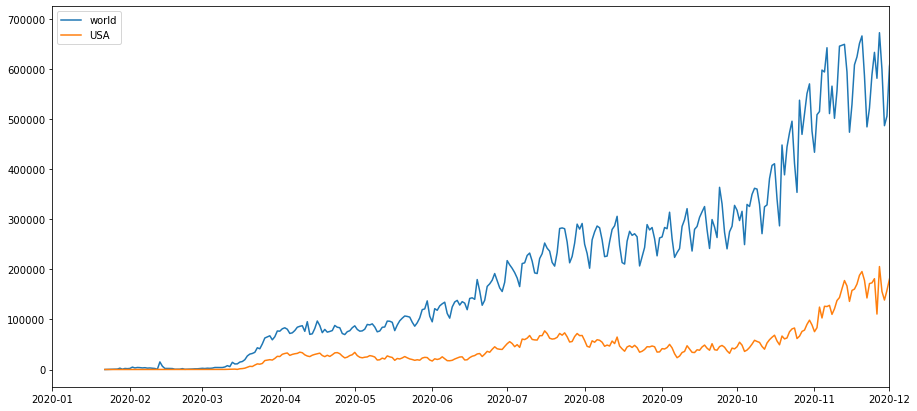

In [3]:
plt.figure(figsize=(15,7))
plt.plot(df_covid_new_cases['date'], df_covid_new_cases['new_cases_world'], label='world')
plt.plot(df_covid_new_cases['date'], df_covid_new_cases['new_cases_USA'], label='USA')
plt.xlim(datetime(2020,1,1),datetime(2020,12,1))
plt.legend()
plt.show()

画个小图看看NASDAQ指数的变化趋势：

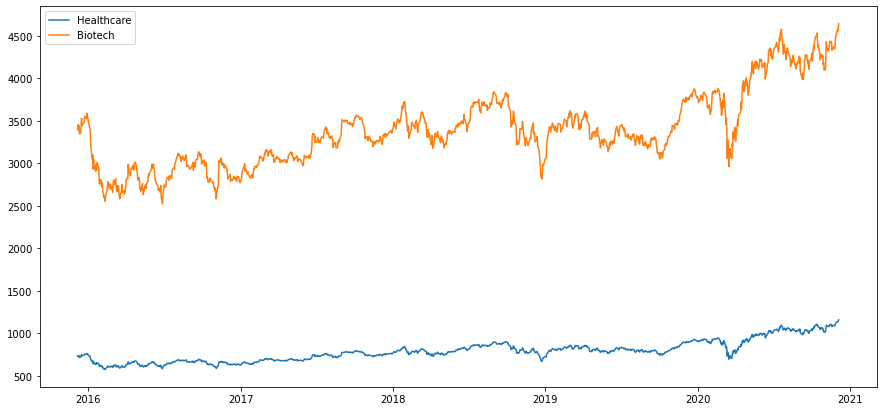

In [4]:
plt.figure(figsize=(15,7))
plt.plot(df_NASDAQ_Healthcare['date'], df_NASDAQ_Healthcare['healthcare'], label='Healthcare')
plt.plot(df_NASDAQ_Biotech['date'], df_NASDAQ_Biotech['biotech'], label='Biotech')
plt.legend()
plt.show()

# Linear Regression
总线性回归模型：

$$y_t \sim y_{t-1} + y_{t-7} + trends\_vaccine_{t-1} + covid\_cases_{t-1}$$

$y_t$: 当天指数收盘值

$y_{t-1}$: 前一天指数收盘值，如果遇到星期一，前一天定义为上周五

$y_{t-7}$: 上一周同日指数收盘值，例如今天是周一，$y_{t-7}$就对应上周一的值

$trends\_vaccine_{t-1}$: 前一天的疫苗搜索指数，t-1的处理方法和收盘值相同

$trends\_vaccine_{t-1}$: 前一天的新冠确诊病例(这里有一个问题就是确诊数是按周波动的，周五周六周日的值通常偏低, 我这里暂且对这个数据进行了和收盘值相同的处理方式，以减弱周六周日确诊病例数偏低的影响，但后面能看到这种周期性波动的影响还是存在的)

为了方便回归分析，我们先把这些predictor的值全部导入df_reg这张表里:

In [5]:
df_reg = pd.merge(df_NASDAQ_Healthcare, df_NASDAQ_Biotech, left_on='date', right_on='date')
predictors_list = ['healthcare_t_1','healthcare_t_7','biotech_t_1','biotech_t_7','trends_vaccine_t_1','covid_cases_t_1']

for i in predictors_list:
    df_reg[i] = np.nan
df_reg.head(20)

,date,healthcare,biotech,healthcare_t_1,healthcare_t_7,biotech_t_1,biotech_t_7,trends_vaccine_t_1,covid_cases_t_1
0,2015-12-07,730.549988,3395.580078,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-12-08,740.640015,3458.629883,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-12-09,728.710022,3402.669922,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-12-10,736.619995,3444.989990,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-12-11,718.440002,3347.600098,NaN,NaN,NaN,NaN,NaN,NaN
5,2015-12-14,720.250000,3355.899902,NaN,NaN,NaN,NaN,NaN,NaN
6,2015-12-15,736.710022,3450.919922,NaN,NaN,NaN,NaN,NaN,NaN
7,2015-12-16,750.520020,3530.620117,NaN,NaN,NaN,NaN,NaN,NaN
8,2015-12-17,740.859985,3471.409912,NaN,NaN,NaN,NaN,NaN,NaN
9,2015-12-18,735.000000,3449.010010,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
for i in df_reg.loc[df_reg['date']>=datetime(2015,12,14),'date'].index:
    t = df_reg.loc[i,'date']
    t_7 = t - pd.Timedelta(7, unit='d') # 7 days ago
    if t.weekday()==0:# Monday
        t_1 = t-pd.Timedelta(3,unit='d') # last Friday
    else: 
        t_1 = t-pd.Timedelta(1,unit='d') # last day
        
    df_reg.loc[i,'healthcare_t_1'] = df_reg.loc[df_reg['date']==t_1,'healthcare'].sum()
    df_reg.loc[i,'biotech_t_1'] = df_reg.loc[df_reg['date']==t_1,'biotech'].sum()
    df_reg.loc[i,'trends_vaccine_t_1'] = df_trends.loc[df_trends['date']==t_1,'trends_vaccine'].sum()
    df_reg.loc[i,'covid_cases_t_1'] = df_covid_new_cases.loc[df_covid_new_cases['date']==t_1,'new_cases_world'].sum()
    df_reg.loc[i,'healthcare_t_7'] = df_reg.loc[df_reg['date']==t_7,'healthcare'].sum()
    df_reg.loc[i,'biotech_t_7'] = df_reg.loc[df_reg['date']==t_7,'biotech'].sum()

df_reg

,date,healthcare,biotech,healthcare_t_1,healthcare_t_7,biotech_t_1,biotech_t_7,trends_vaccine_t_1,covid_cases_t_1
0,2015-12-07,730.549988,3395.580078,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-12-08,740.640015,3458.629883,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-12-09,728.710022,3402.669922,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-12-10,736.619995,3444.989990,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-12-11,718.440002,3347.600098,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1254,2020-11-30,1135.010010,4554.479980,1123.569946,1095.430054,4505.310059,4374.600098,40.0,672317.0
1255,2020-12-01,1137.359985,4571.319824,1135.010010,1089.339966,4554.479980,4346.000000,49.0,505910.0
1256,2020-12-02,1137.680054,4558.669922,1137.359985,1094.109985,4571.319824,4369.439941,52.0,604959.0
1257,2020-12-03,1145.670044,4599.620117,1137.680054,0.000000,4558.669922,0.000000,78.0,646532.0


In [7]:
df_reg = df_reg.loc[df_reg['date'] > datetime(2015,12,11)]
df_reg.head(20)

,date,healthcare,biotech,healthcare_t_1,healthcare_t_7,biotech_t_1,biotech_t_7,trends_vaccine_t_1,covid_cases_t_1
5,2015-12-14,720.250000,3355.899902,718.440002,730.549988,3347.600098,3395.580078,10.587614,0.0
6,2015-12-15,736.710022,3450.919922,720.250000,740.640015,3355.899902,3458.629883,11.646376,0.0
7,2015-12-16,750.520020,3530.620117,736.710022,728.710022,3450.919922,3402.669922,10.940535,0.0
8,2015-12-17,740.859985,3471.409912,750.520020,736.619995,3530.620117,3444.989990,11.116995,0.0
9,2015-12-18,735.000000,3449.010010,740.859985,718.440002,3471.409912,3347.600098,9.881773,0.0
10,2015-12-21,741.380005,3475.360107,735.000000,720.250000,3449.010010,3355.899902,8.823012,0.0
11,2015-12-22,743.619995,3479.629883,741.380005,736.710022,3475.360107,3450.919922,9.352393,0.0
12,2015-12-23,755.200012,3543.040039,743.619995,750.520020,3479.629883,3530.620117,8.470091,0.0
13,2015-12-24,757.659973,3555.060059,755.200012,740.859985,3543.040039,3471.409912,8.117171,0.0
14,2015-12-28,751.549988,3525.969971,0.000000,741.380005,0.000000,3475.360107,5.823188,0.0


### 下面开始线性回归
我们比较四个模型：
* X_0 基准模型 AR-1 Baseline
* X_1 和基准模型相比，predictor加了谷歌趋势
* X_2 和基准模型相比，predictor加了新冠病例
* X_3 和基准模型相比，predictor加了谷歌趋势和新冠病例

#### 先做一个NASDAQ-Biotech的in-sample prediction，比较R2
定义一个函数LinearInSample，输入回归分析的时间范围和作图的时间范围，输出四个模型的R2值并画出预测的指数和实际的指数

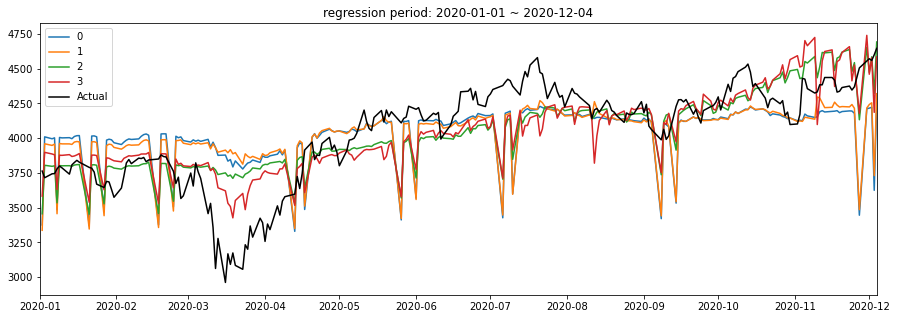

R2(0) = 0.2833149916649036
R2(1) = 0.29058729267564576
R2(2) = 0.5588926555213871
R2(3) = 0.6018063544469915


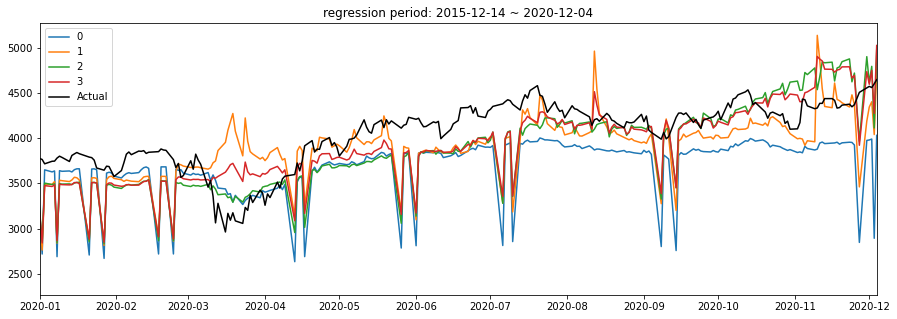

R2(0) = 0.47278888812414144
R2(1) = 0.5980975215302454
R2(2) = 0.6257959911221872
R2(3) = 0.6378195738684387


()

In [8]:
import sklearn
from sklearn.linear_model import LinearRegression

def LinearInSample (t_min, t_max, xlim_left, xlim_right):
    # Custom time range of regression samples
    df_reg_custom = df_reg.loc[(df_reg['date'] >= t_min) & (df_reg['date'] <= t_max)]
    
    # Extract predictors for different models
    X_0 = df_reg_custom[['biotech_t_1','biotech_t_7']] # no additional predictors
    X_1 = df_reg_custom[['biotech_t_1','biotech_t_7','trends_vaccine_t_1']] # additional predictors: trends_vaccine_t_1
    X_2 = df_reg_custom[['biotech_t_1','biotech_t_7','covid_cases_t_1']] # additional predictors: covid_cases_t_1
    X_3 = df_reg_custom[['biotech_t_1','biotech_t_7','trends_vaccine_t_1','covid_cases_t_1']] # additional predictors: trends_vaccine_t_1 and covid_cases
    y = df_reg_custom['biotech']
    
    # Plot the predictions
    plt.figure(figsize=(15,5))
    for i in [0,1,2,3]:
        X_temp = locals()['X_' + str(i)]
        reg_temp = LinearRegression().fit(X_temp,y)
        y_temp = reg_temp.predict(X_temp)
        plt.plot(df_reg_custom['date'], y_temp, label = str(i))
        locals()['reg_' + str(i)] = reg_temp # save regression to reg_i
        locals()['y_' + str(i)] = y_temp # save prediction to y_i

    plt.plot(df_reg_custom['date'], y, label = 'Actual', color = 'k')
    plt.legend()
    plt.title('regression period: ' + str(t_min.strftime("%Y-%m-%d")) + ' ~ ' +str(t_max.strftime("%Y-%m-%d")))
    plt.xlim(xlim_left,xlim_right)
    plt.show()

    # Print R2 values
    for i in [0,1,2,3]:
        print('R2('+ str(i) + ') = ' + str(sklearn.metrics.r2_score(y,locals()['y_' + str(i)])))

    return()

LinearInSample(datetime(2020,1,1), datetime(2020,12,4), datetime(2020,1,1), datetime(2020,12,4))
LinearInSample(datetime(2015,12,14), datetime(2020,12,4), datetime(2020,1,1), datetime(2020,12,4))
# from statsmodels.formula.api  import ols
# est_naive = ols(formula = 'biotech ~ biotech_t_1 + biotech_t_7', data = df_reg).fit()
# est_naive.summary()

强行解（吹）释（个）一（牛）下（皮），2020年谷歌趋势对于r2的提升不大，确诊病例对于r2的提升很大。个人猜测关于疫苗的搜索趋势是一个模糊的指标，因为疫苗的新闻可能是好消息也有可能是坏消息。如果纵观近五年，发现谷歌趋势和确诊病例对于r2的提升差不多，新冠病例更胜一筹。

#### 然后做一个rolling-window prediction，比较MAE
定义函数LinearRollingPred，依靠输入参数确定训练集，输出一个dataframe, 包含\[t_start,t_max\]这个时间区间的四个模型的预测值与实际值
* t_start: 从这天开始，用当天之前的所有数据预测当天的收盘值
* t_max: 预测到这天结束
* t_min: 测试集从这天开始
* xlim_left, xlim_right: 画图和计算MAE的区间，这个函数可以在画图的同时把图片显示区间的MAE计算好，显示在图例里面

In [9]:
def LinearRollingPred (t_min, t_max, t_start, xlim_left, xlim_right):
    # Define a dataframe in the time slot [t_start,t_max] to store predicted values
    t_slot = df_reg.loc[(df_reg['date'] >= t_start) & (df_reg['date'] <= t_max),'date']
    y_slot = df_reg.loc[(df_reg['date'] >= t_start) & (df_reg['date'] <= t_max),'biotech']
    df_slot = pd.DataFrame({'date':t_slot,'y':y_slot, 'y_0':np.nan, 'y_1':np.nan, 'y_2':np.nan, 'y_3':np.nan})
    
    for t in t_slot:
        
        # range of training set: [t_min,t)
        df_reg_custom = df_reg.loc[(df_reg['date'] >= t_min) & (df_reg['date'] < t)]
    
        # Extract predictors for different models
        X_0 = df_reg_custom[['biotech_t_1','biotech_t_7']] # no additional predictors
        X_0_t = df_reg.loc[df_reg['date'] == t, ['biotech_t_1','biotech_t_7']]
        
        X_1 = df_reg_custom[['biotech_t_1','biotech_t_7','trends_vaccine_t_1']] # additional predictors: trends_vaccine_t_1
        X_1_t = df_reg.loc[df_reg['date'] == t, ['biotech_t_1','biotech_t_7','trends_vaccine_t_1']]
        
        X_2 = df_reg_custom[['biotech_t_1','biotech_t_7','covid_cases_t_1']] # additional predictors: covid_cases_t_1
        X_2_t = df_reg.loc[df_reg['date'] == t, ['biotech_t_1','biotech_t_7','covid_cases_t_1']]
        
        X_3 = df_reg_custom[['biotech_t_1','biotech_t_7','trends_vaccine_t_1','covid_cases_t_1']] # additional predictors: trends_vaccine_t_1 and covid_cases
        X_3_t = df_reg.loc[df_reg['date'] == t, ['biotech_t_1','biotech_t_7','trends_vaccine_t_1','covid_cases_t_1']]
        
        y = df_reg_custom['biotech']
    
        # Prediction
        for i in [0, 1, 2 ,3]:
            X_temp = locals()['X_' + str(i)]
            reg_temp = LinearRegression().fit(X_temp,y)
            df_slot.loc[df_slot['date']==t,'y_' + str(i)] = reg_temp.predict(locals()['X_' + str(i) + '_t']) #.sum
        
    # Plot (MAE calculated within the plot range)
    df_plot = df_slot.loc[(df_slot['date'] >= xlim_left) & (df_slot['date'] <= xlim_right)]
    import  sklearn.metrics as metrics
    
    plt.figure(figsize=(15,5))
    for i in [0,1,2,3]:
        locals()['MAE_'+str(i)] = metrics.mean_absolute_error(df_plot['y'], df_plot['y_'+str(i)])
        plt.plot(df_plot['date'], df_plot['y_'+str(i)], label = str(i) + ', MAE = ' + str(locals()['MAE_'+str(i)]))
        
    plt.plot(df_plot['date'], df_plot['y'], color='k', label='Actual')
    plt.title('t_min = ' + t_min.strftime("%Y-%m-%d") + ', t_max = ' + t_max.strftime("%Y-%m-%d") + ', t_start = ' + t_start.strftime("%Y-%m-%d"))
    plt.legend()
    plt.show()
        
    return(df_slot)

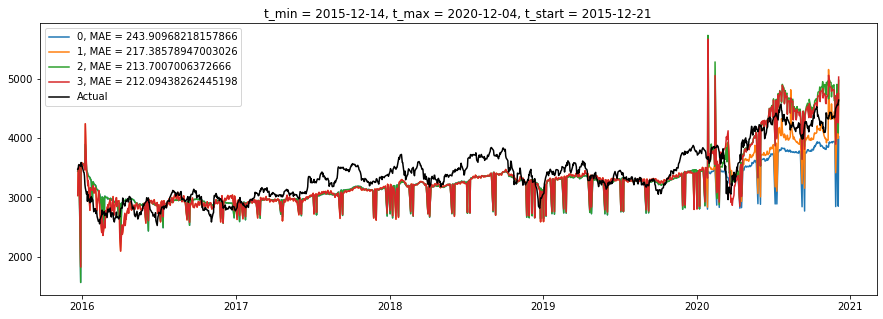

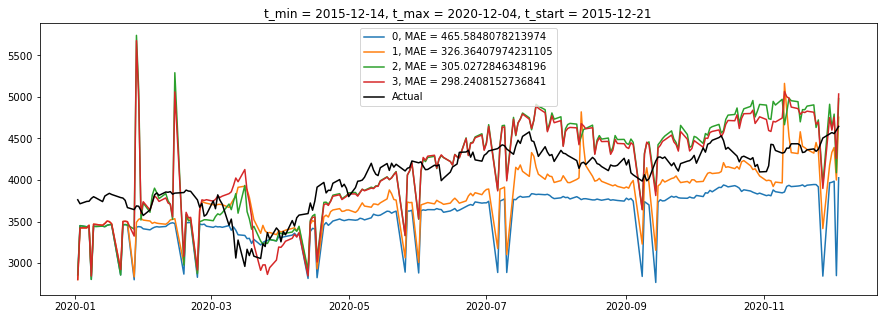

In [10]:
LinearRollingPred(datetime(2015,12,14), datetime(2020,12,4), datetime(2015,12,21), datetime(2015,12,14), datetime(2020,12,4))
df_test = LinearRollingPred(datetime(2015,12,14), datetime(2020,12,4), datetime(2015,12,21), datetime(2020,1,1), datetime(2020,12,4))

扯淡时间：
比较四个模型，结论和in-sample fitting差不多，即引入两个predictor都可以降低MAE，但是新冠确诊病例降低MAE的效果更加明显。
在rolling windows的起点相同时，可以看到2020年的MAE要比近五年的总MAE大(WTF?)，可能意味着疫情期间的股市更加难以预测？例如2020-03-09 ~ 2020-03-18，这几天美股接连熔断（暴跌），我们的模型均未能预测到，而且模型预测的暴跌时间有明显延迟。
(吐槽一句，我tm要是能预测到美股熔断我能在这上课？）

# 有几个问题需要解决：
* 确诊病例周期性波动，但是股市不会有这么规律的行为（可以看上图的红线和绿线，说明确诊病例的波动影响了我们的预测），求各位大哥想想办法
* 无论是in-sample prediction还是rolling window prediction，我们预测的曲线都很很多向下的尖峰，不知道是啥玩意
* 使用新模型来提升预测效果
* 像TA说的那样再研究一些其他的google trends。这里再骂一下谷歌，如果我们要研究两年以上的时间跨度，trends数据的处理会比较烦。